In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from imblearn.over_sampling import SMOTE
from collections import Counter 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_auc_score,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 


In [10]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
#Distinguish fraudulent activity and non fraudulent activity

fraud = data.loc[data['Class'] == 1]
non_fraud = data.loc[data['Class'] == 0]

In [19]:
len(fraud)

492

In [64]:
print(data.shape)

(284807, 31)


In [20]:
print(fraud.shape)

(492, 31)


In [21]:
print(non_fraud.shape)

(284315, 31)


In [22]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Exploratory Data Analysis**

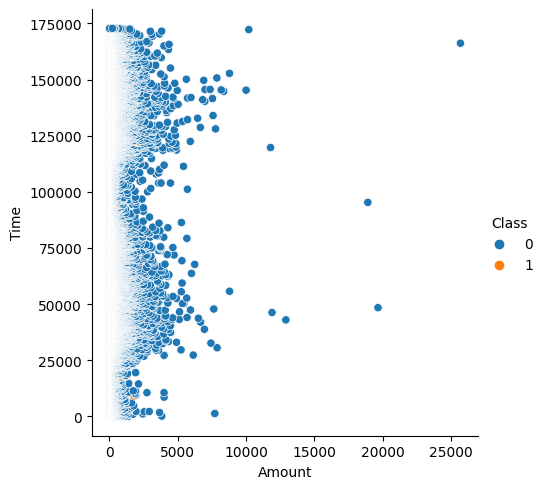

In [26]:

#finding the relationship between Amount and Class
import seaborn as sns
sns.relplot(x = 'Amount', y = 'Time', hue = 'Class', data = data)


In [28]:
# Define features (X) and target variable (y)

X = data.drop('Class', axis=1)  # Drop the 'Class' column to get features
y = data['Class']  # The 'Class' column is the target variable (0 or 1 for fraud)

In [29]:
# Now X contains all the features to help predict if a transaction is fraudulent,
# and y contains the labels (0 or 1) indicating whether each transaction is fraud or not.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Original class distribution:', Counter(y_train))
print('Resampled class distribution:', Counter(y_train_resampled))

Original class distribution: Counter({0: 227456, 1: 389})
Resampled class distribution: Counter({0: 227456, 1: 227456})


In [53]:
# Check the distribution in the original training set
print('Original class distribution:')
print(y_train.value_counts())

Original class distribution:
Class
0    227456
1       389
Name: count, dtype: int64


In [54]:
# Check the distribution in the resampled training set
print('Resampled class distribution:')
print(y_train_resampled.value_counts())

Resampled class distribution:
Class
0    227456
1    227456
Name: count, dtype: int64


In [72]:
# Create a custom class weight dictionary
class_weights = {0: 1, 1: 3}  # Assign a higher weight to the fraud class (1)

# Instantiate the logistic regression model with balanced class weights
#max_iter ensures that the model has enough iterations to learn from the data without stopping too soon, which could lead to incomplete or poor fitting.
clf = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear')

#fit the model
clf.fit(X_train_resampled, y_train_resampled)

# Predict using the test set
y_pred_resampled = clf.predict(X_test)


In [73]:
logistic_model = LogisticRegression(random_state=42)



# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [500, 600, 700],   # Number of iterations to converge
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithm
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model, 
                             param_grid=param_grid,
                             scoring='roc_auc',  # You can change this to precision, recall, etc.
                             cv=3,  # 3-fold cross-validation
                             verbose=2,  # Verbosity level
                             n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best ROC-AUC Score from CV:", best_score)

# Now use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
Best ROC-AUC Score from CV: 0.9925552183397715
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56859
           1       0.09      0.91      0.16       103

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9749627634497667


In [69]:
#Fit the model
clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1, max_iter=500)

[CV] END .................C=0.01, max_iter=500, solver=lbfgs; total time=   3.9s
[CV] END .............C=0.01, max_iter=500, solver=liblinear; total time=   8.6s
[CV] END .............C=0.01, max_iter=600, solver=liblinear; total time=   8.5s
[CV] END .............C=0.01, max_iter=700, solver=liblinear; total time=   9.9s
[CV] END ..................C=0.1, max_iter=500, solver=lbfgs; total time=   5.3s
[CV] END ..................C=0.1, max_iter=600, solver=lbfgs; total time=   6.9s
[CV] END ..............C=0.1, max_iter=600, solver=liblinear; total time=   8.5s
[CV] END ..................C=0.1, max_iter=700, solver=lbfgs; total time=   5.6s
[CV] END ....................C=1, max_iter=500, solver=lbfgs; total time=  14.4s
[CV] END ....................C=1, max_iter=600, solver=lbfgs; total time=  15.1s
[CV] END ....................C=1, max_iter=700, solver=lbfgs; total time=   6.1s
[CV] END ................C=1, max_iter=700, solver=liblinear; total time=   8.2s
[CV] END ...................

In [59]:
#Predict the model
y_pred = np.array(clf.predict(X_test))
y = np.array(y_test)
print(confusion_matrix(y_test, y_pred)) 

[[55669  1190]
 [    9    94]]


In [60]:
print(accuracy_score(y_test, y_pred))

0.9789508795337243


In [61]:
#classification report
y_pred = clf.predict(X_test)  # Re-running predictions just in case
print(classification_report(y_test, y_pred))  # Classification report showing precision, recall, F1-score

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56859
           1       0.07      0.91      0.14       103

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [51]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # predict_proba gives probabilities for both classes
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9706220992586498


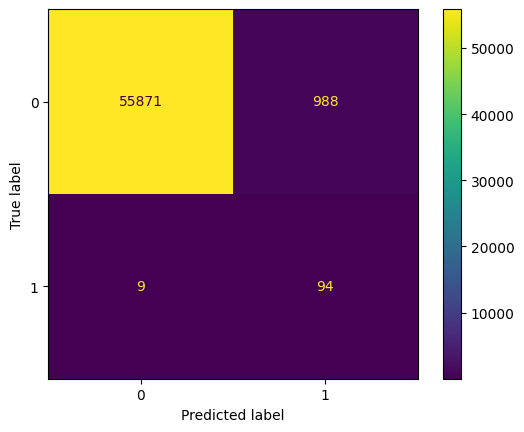

In [82]:
#performance of model across different classes

cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


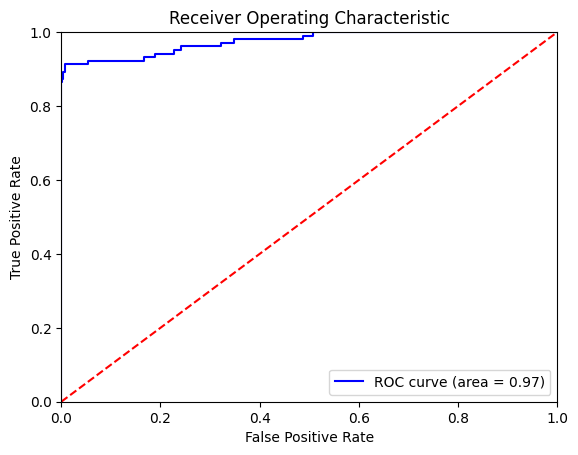

In [77]:
#Visualize the ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


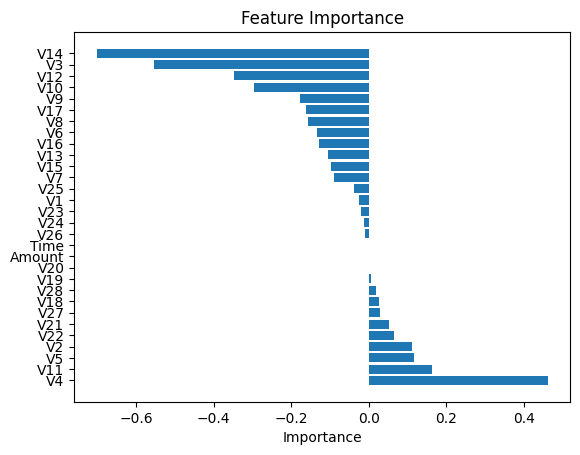

In [78]:
#Feature_importace
importance = clf.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
